# TimeSeries Mooring Data - Quick Plot - Multideployment

From an erddap Dataset, specify the Mooring IDs to get a quick plot of the data

In [1]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
server_url = 'http://ecofoci-field.pmel.noaa.gov:8080/erddap'
# dataset_name = {'21upp1a':'datasets_Mooring_21upp1a_final',
#                 '22upp3a':'datasets_Mooring_22upp3a_final',
#                 '23upp3a':'datasets_Mooring_23upp3a_final',
#                }
dataset_name = {'16ckp12a':'datasets_Mooring_16ckp12a_final',
                '17ckp12a':'datasets_Mooring_17ckp12a_final',
                '18ckp12a':'datasets_Mooring_18ckp12a_final',
                '19ckp12a':'datasets_Mooring_19ckp12a_final',
                '20ckp12a':'datasets_Mooring_20ckp12a_final',
                '21ckp12a':'datasets_Mooring_21ckp12a_final',
                '22ckp12a':'datasets_Mooring_22ckp12a_final',
                '23ckp12a':'datasets_Mooring_23ckp12a_final',
               }

In [3]:
pdf = {}             

In [4]:
e = ERDDAP(server=server_url,
          protocol='tabledap',
          response='csv')

for ds,dn in enumerate(dataset_name):
        
    e.dataset_id=dataset_name[dn]
    
    df = e.to_pandas(
                index_col='time (UTC)',
                parse_dates=True,
                skiprows=(1,)  # units information can be dropped.
            )
    df.columns = [x.split()[0] for x in df.columns]
    pdf.update({dn:df})

/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/erddapy/core/interfaces.py:39: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(data, **(pandas_kwargs or {}))
/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/erddapy/core/interfaces.py:39: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(data, **(pandas_kwargs or {}))
/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/erddapy/core/interfaces.py:39: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(data, **(pandas_kwargs or {}))


In [5]:
cpdf = pdf.copy()
for datasets in pdf:
    cpdf[datasets] = pdf[datasets][pdf[datasets]['timeseries_id'].str.contains('wcp') \
    ]

In [6]:
for datasets in pdf:
    pdf[datasets] = pdf[datasets][pdf[datasets]['timeseries_id'].str.contains('s37') \
    | pdf[datasets]['timeseries_id'].str.contains('s16') \
    | pdf[datasets]['timeseries_id'].str.contains('rcmsg') \
    # | pdf[datasets]['timeseries_id'].str.contains('an9') \
    ]

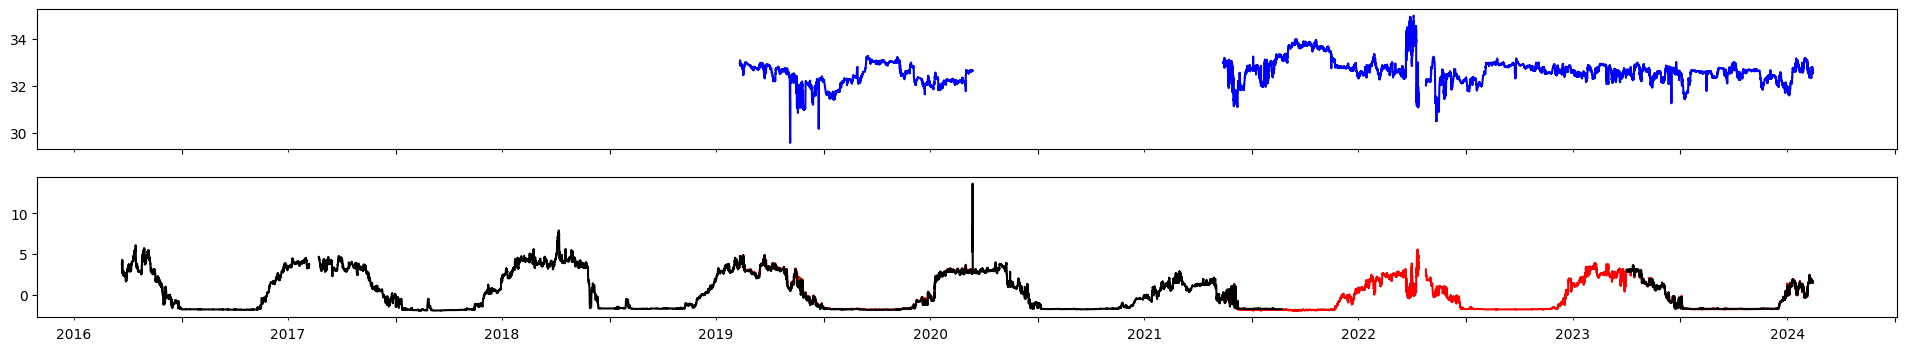

In [7]:
from matplotlib.dates import DayLocator, MonthLocator, DateFormatter

fig, ax = plt.subplots(2,figsize=(24, 4),sharex=True)
for datasets in pdf:
    ax[0].plot(pdf[datasets].index,pdf[datasets].salinity,'b')
    ax[1].plot(pdf[datasets].index,pdf[datasets].temperature,'r')
    # pdf[datasets].temperature.to_csv(f'{datasets}.salinity.csv')
for datasets in cpdf:
    ax[1].plot(cpdf[datasets].index,cpdf[datasets].temperature,'k')

# xfmt = mdates.DateFormatter('%d-%b')
ax[1].xaxis.set_major_locator(MonthLocator(bymonth=[1]))
ax[1].xaxis.set_minor_locator(MonthLocator(bymonth=7))
ax[1].xaxis.set_minor_formatter(DateFormatter('%Y'))
ax[1].xaxis.set_major_formatter(DateFormatter(''))
ax[1].xaxis.set_tick_params(which='major', pad=3)
ax[1].xaxis.set_tick_params(which='minor', pad=5)

